In [828]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split

In [829]:
dt=pd.read_csv('train.csv')

In [830]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [831]:
dt['Age'].fillna(dt['Age'].median(), inplace=True)

/tmp/ipython-input-831-561013671.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['Age'].fillna(dt['Age'].median(), inplace=True)


In [832]:
dt.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

In [833]:
dt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [834]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [835]:
dt.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [836]:
dt['Embarked'].fillna(dt['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-836-3818134209.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['Embarked'].fillna(dt['Embarked'].mode()[0], inplace=True)


In [837]:
sex = pd.get_dummies(dt['Sex']).astype(int)
embark = pd.get_dummies(dt['Embarked']).astype(int)

In [838]:
dt.drop(['Sex','Embarked','Ticket'],axis=1,inplace=True)

In [839]:
dt = pd.concat([dt,sex,embark],axis=1)

In [840]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt['Pclass'] = le.fit_transform(dt['Pclass'])

/tmp/ipython-input-841-1875149769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Pclass',y='Age',data=dt,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

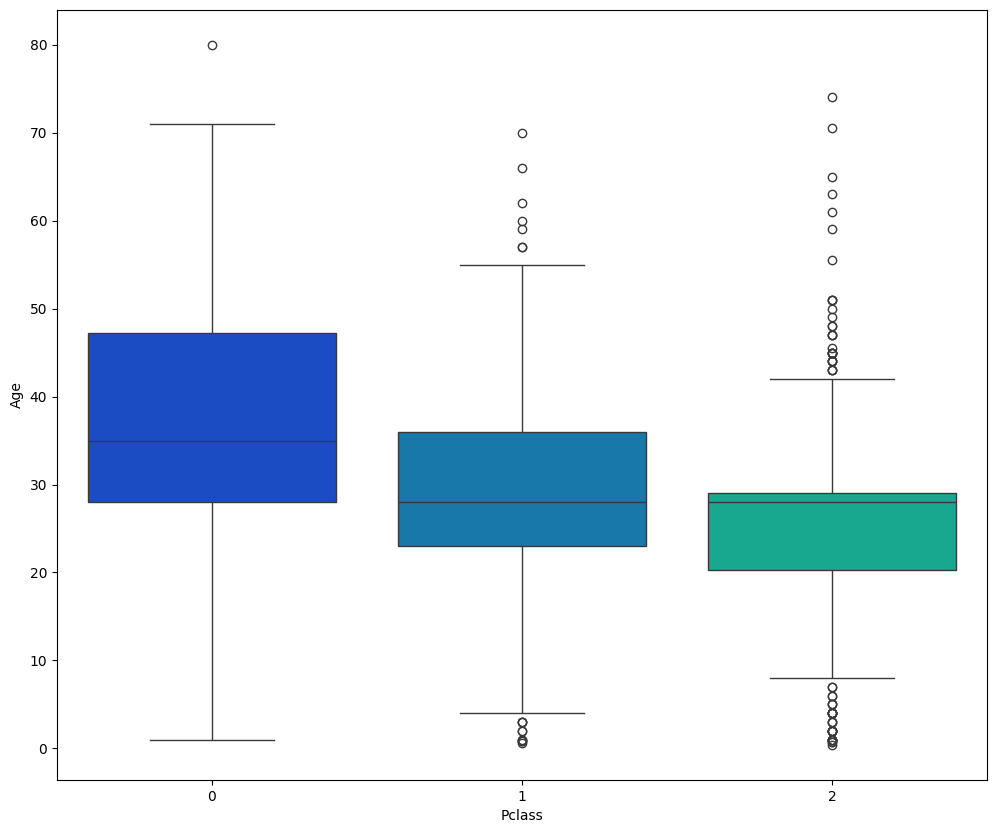

In [841]:
plt.figure(figsize=(12, 10))
sb.boxplot(x='Pclass',y='Age',data=dt,palette='winter')

In [842]:
dt.groupby('Pclass')['Age'].median()

,Age
Pclass,
0,35.0
1,28.0
2,28.0


In [843]:
# def impute_age(cols):
#     Age = cols['Age']
#     Pclass = cols['Pclass']

#     if pd.isnull(Age):
#         if Pclass == 1:
#             return 37
#         elif Pclass == 2:
#             return 29
#         else:
#             return 24
#     else:
#         return Age

In [844]:
# dt['Age'] = dt[['Age','Pclass']].apply(impute_age,axis=1)

In [845]:
Y=dt.iloc[:,0]
X=dt.iloc[:,1:-1]

In [846]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.05,random_state=0)

In [847]:
from sklearn.linear_model import LogisticRegression
Lreg=LogisticRegression(max_iter=800)
Lreg.fit(X_train,Y_train)

LogisticRegression(max_iter=800)

In [848]:
Y_pred=Lreg.predict(X_test)

In [849]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix(Y_test,Y_pred)

array([[22,  3],
       [ 4, 16]])

In [850]:
accuracy=accuracy_score(Y_test,Y_pred)

In [851]:
accuracy

0.8444444444444444